# Numerical analysis of ergodicity of 1D potentials thermostatted using the DD algorithm

## Harmonic Oscillator

In [1]:
using HDF5
using PyPlot
using PyCall
@pyimport matplotlib as mpl
mpl.style[:use]("ggplot")

In [2]:
potentialname = "HO"
filename = "ig3cHO"
file = h5open("../poincaredata/sectionsandtrajectories/$filename.hdf5","r")
file2 = h5open("../poincaredata/$potentialname/$(filename)1.hdf5","r")
data = read(file["trajectory"]);

In [3]:
t = data[:,1][1:10:end]
q = data[:,2][1:10:end]
p = data[:,3][1:10:end]
z = data[:,4][1:10:end]
Q = read(attrs(file2)["Q"])
T = read(attrs(file2)["T"])
beta = 1./T;

In [4]:
if potentialname == "HO"
    potential(x) = x^2/2.
elseif potentialname == "QP"
    potential(x) = x^4/4.
elseif potentialname == "MH"
    potential(x) = -1/2.*x^2 + 1/4.*x^4
end

potential (generic function with 1 method)

In [5]:
#Theoretical distributions
rhoq = sqrt(beta/(2.*pi))*exp(-beta*Float64[potential(i) for i in q]); 
rhop = sqrt(beta/(2.*pi))*exp(-beta*p.^2/2.)
rhoz = exp(z/Q)./(Q*(1.+ exp(z/Q)).^2);

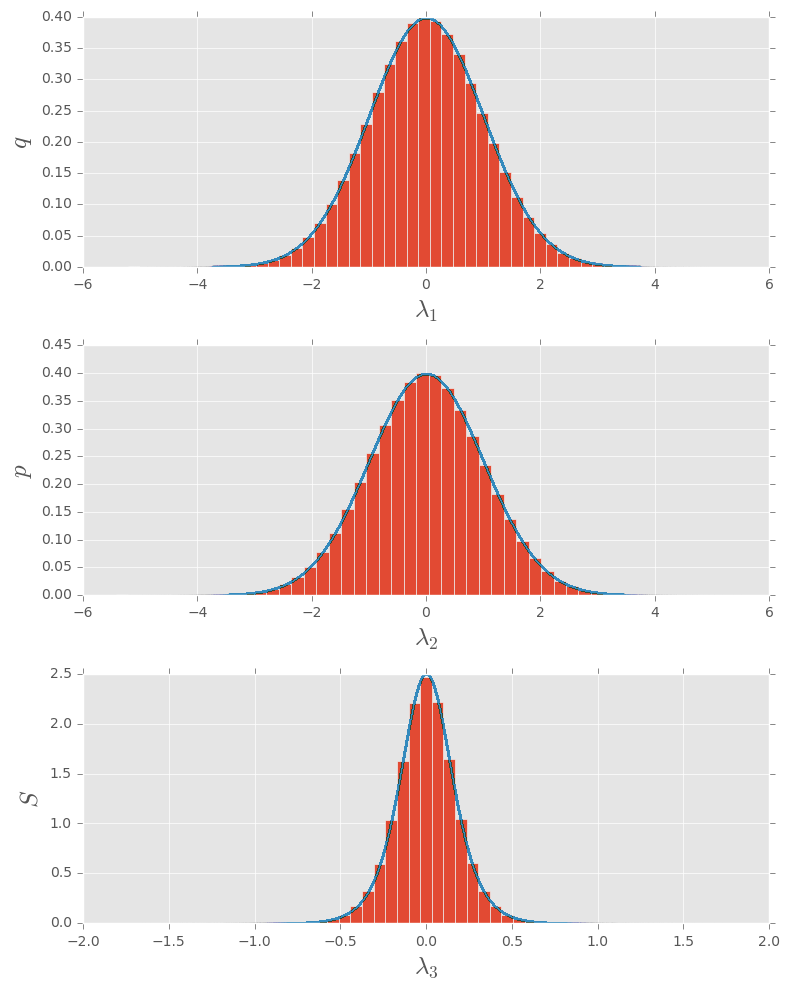

In [7]:
fig = plt[:figure](figsize=(8,10))
#fig[:subplots_adjust](hspace=.5)


ax = fig[:add_subplot](311)
ax[:set_xlabel](L"$\lambda_1$",fontsize="18")
ax[:set_ylabel](L"$q$",fontsize="18")
ax[:hist](q, 50, normed = 1)
ax[:plot](q,rhoq, ".",ms=0.5)

ax = fig[:add_subplot](312)
ax[:set_xlabel](L"$\lambda_2$",fontsize="18")
ax[:set_ylabel](L"$p$", fontsize="18")
ax[:hist](p, 50, normed = 1)
ax[:plot](p,rhop, ".",ms=0.5)
#ax[:ticklabel_format](style="sci", axis="x" , scilimits = (0,0))

ax = fig[:add_subplot](313)
ax[:set_xlabel](L"$\lambda_3$",fontsize="18")
ax[:set_ylabel](L"$S$",fontsize="18")
ax[:hist](z, 50, normed = 1)
ax[:plot](z,rhoz, ".",ms=0.5)


plt[:tight_layout]()

plt[:savefig]("../plots/histograms$filename.png")